## Methodology for comparing the genetic expression levels for two populations

In medical research, RNA sequence data is used to find the level of expression of different genes within the genome. Researchers may use RNA sequence data from patients to identify genes whose mean expression levels differ two populations  (e.g. male versus female or cancerous versus non-cancerous).  In classical statistics, significant differences between population means is done using a t-test: a t statistic is computed for each gene, and p-values are computed based on the t statistics. Typically researchers want to identify which population has the higher expression level, so they can compute the two one-sided p-values for each gene.  The smaller the p-value, the greater the likelihood that the expression level is significantly different.

However, there are some problems with using the t-test in this case. The t-test is based on the assumption that gene expression levels are normally distributed, which is definitely not the case. Furthermore, because so many genes are being tested (more than 20,000, in the human genome), some will genes will give very small p-values simply due to random variation. 
So the question arises, How many of the genes with low p-values really represent significant differences between the two populations?

In order to answer this question, we may turn to a newer statistical technique called $resampling$. Compared to the t-test, resampling is much more computationally intensive and requires a computer (unlike the t-test, which may be done by hand). Resampling does not assume normality. Instead, the fundamental assumption of resampling is that the empirical distribution of the samples themselves can be taken as a good representation of the underlying distribution. Indeed, in the absence of other information, it would seem that the empirical distribution is the best one can do to estimate the source distribution.  

Let us illustrate how resampling works with an example. Suppose we have genetic data from two samples of patients drawn from two different populations. We denote these genetic samples as $A$ and $B$, respectively. In the following procedure, **we will estimate how many of the genes in $B$ have statistically significantly higher expression levels in $B$ than in $A$**. 

First, there are some genes that we can remove from consideration. For a few genes,@@@ only a few patients have nonzero expression levels and most patients have zero expression@@@. Such genes can have very low p-values (for example, if all the nonzero patients are in group $A$), but since so few values are nonzero it cannot be concluded that there are statistically significant differences, so these genes may be excluded. (I kind of undertand)

In order to identify genes that have higher expression levels in $B$ than in $A$, we define a procedure (which we denote as $P$) that we will apply repeatedly. Procedure $P$ begins by  drawing a random sample $C_1$ (with replacement) from $A$, where $C_1$ has the same size as $B$. Next, we compute p-values for the hypothesis $C_1 > A$, and identify all genes that have a lower p-values for $C_1 > A$ than in $B > A$. For these genes, the difference in expression level between $A$ and $B$ can be attributed to chance, because random sample $C_1$ (which represents $A$'s distribution, according to the resampling assumption) obtains a comparable expression level. These genes may thus be removed from consideration. We redraw random samples $C_2$ (with replacement) from $A$ and identify genes $g$ that have a lower p-values for $C_2 > A$ than for $B > A$. As before, these genes may be removed from consideration. We repeat this for $C_3, C_4, \ldots C_N$, where $N$ is a large value. For the genes that remain, we have a high confidence that these are significantly higher in $B$ than in $A$. 

We have implemented this algorithm in  Python. First, we import the data:

In [1]:
from importDataFn import importDataFn

# Remove all genes expressed fewer than this many times
minExpress = 5

ClinicalDF,ClinicalPatientID,RSEMPatientID,geneVals,geneIDs = importDataFn(minExpress)

ModuleNotFoundError: No module named 'importDataFn'

In [3]:
print(ClinicalDF)

              AGE     SEX AJCC_PATHOLOGIC_TUMOR_STAGE AJCC_STAGING_EDITION  \
PATIENT_ID                                                                   
TCGA-2F-A9KO   63    Male                    STAGE IV                  6TH   
TCGA-2F-A9KP   66    Male                    STAGE IV                  7TH   
TCGA-2F-A9KQ   69    Male                   STAGE III                  6TH   
TCGA-2F-A9KR   59  Female                   STAGE III                  5TH   
TCGA-2F-A9KT   83    Male                    STAGE II                  6TH   
...           ...     ...                         ...                  ...   
TCGA-ZF-AA56   79  Female                   STAGE III                  7TH   
TCGA-ZF-AA58   61  Female                    STAGE IV                  7TH   
TCGA-ZF-AA5H   60  Female                    STAGE IV                  7TH   
TCGA-ZF-AA5N   62  Female                    STAGE IV                  7TH   
TCGA-ZF-AA5P   65    Male                    STAGE IV           

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24


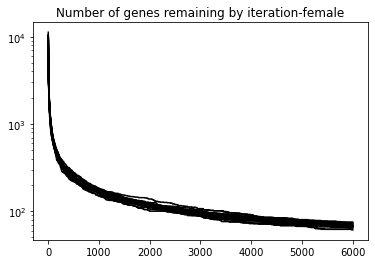

In [1]:
from source.testAlgFn import testAlgFn
import matplotlib.pyplot as plt
import numpy as np

nIter = 25

shuffleData = True
impersonateWithMale = False
sampleWithoutReplacement = False

eqVar = False
nSamples = 1 
nCompares = 6000

pMaxFor_cdf = 0.01
cdfN = 20


altMF = 'less'  # Male is less
# altMF = 'greater' # Male is greater
# altMF = 'two-sided'

# switch sexes and test the other way
switchSex = False

for jj in range(nIter):
    print("Iteration",jj)
    thisSeed = 3141*jj   
    nRemainGenes,FemGenes,xVec,cdfMax,Ftmp = testAlgFn(shuffleData, 
                                                       impersonateWithMale,
                                                       sampleWithoutReplacement,
                                                       eqVar,nSamples,nCompares,
                                                       pMaxFor_cdf,cdfN,
                                                       altMF,switchSex,thisSeed,
                                                       ClinicalDF,geneVals):)   
    plt.plot(FemGenes,'k-')

plt.title("Number of genes remaining by iteration-female")
plt.yscale("log")
plt.show()

We should verify the procedure empirically. One way to verify is to compare with the null hypothesis. The null hypothesis is that $B$ obeys the empirical distribution given by $A$. So we may apply the same procedure, but replace $B$ with a random sample drawn (with replacement) from $A$ of the same size as $B$. We may do this several times for several different samples from A:

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24


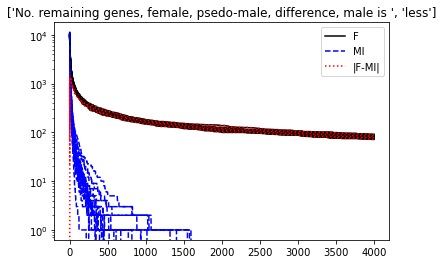

In [2]:
'''
'''
from TestAlgFn import testAlgFn
import matplotlib.pyplot as plt
import numpy as np

nIter = 25 # Number of overall iterations
eqVar = False
nSamples = 1 #  
nCompares = 4000

pMaxFor_cdf = 0.01
cdfN = 20

# Remove all genes expressed fewer than this many times
minExpress = 5


# altMF = 'less'  # Male is less
# altMF = 'greater' # Male is greater
# altMF = 'two-sided'

# switch sexes and test the other way
switchSex = False



for jj in range(nIter):
    print("Iteration",jj)
    
    thisSeed = 3141*jj # Ensure same random generation for both.
    
    shuffleData = True
    impersonateWithMale = False
    sampleWithoutReplacement = False
    nRemainGenes,FemGenes,xVec,cdfMax,Ftmp = testAlgFn(shuffleData, 
                                                       impersonateWithMale,
                                                       sampleWithoutReplacement,
                                                       eqVar,nSamples,nCompares,
                                                       pMaxFor_cdf,cdfN,
                                                       altMF,switchSex,thisSeed,
                                                       ClinicalDF,geneVals):)

    
    impersonateWithMale = True
    nRemainGenes,FemGenes1,xVec,cdfMax,Ftmp = testAlgFn(shuffleData, 
                                                       impersonateWithMale,
                                                       sampleWithoutReplacement,
                                                       eqVar,nSamples,nCompares,
                                                       pMaxFor_cdf,cdfN,
                                                       altMF,switchSex,thisSeed,
                                                       ClinicalDF,geneVals):)
    
    plt.plot(FemGenes,'k-')
    plt.plot(FemGenes1,'b--')
    plt.plot(np.abs(FemGenes-FemGenes1),'r:')

plt.title(["No. remaining genes, female, psedo-male, difference, male is "]+[altMF])
plt.yscale("log")
plt.legend(["F","MI","|F-MI|"])
plt.show()


We get different results if we do not shuffle the male data:

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24


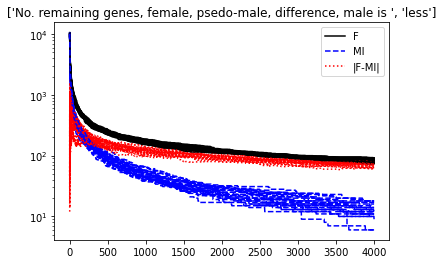

In [3]:
'''
'''
from TestAlgFn import testAlgFn
import matplotlib.pyplot as plt
import numpy as np

nIter = 25 # Number of overall iterations
eqVar = False
nSamples = 1 #  
nCompares = 4000

pMaxFor_cdf = 0.01
cdfN = 20

# Remove all genes expressed fewer than this many times
minExpress = 5


# altMF = 'less'  # Male is less
# altMF = 'greater' # Male is greater
# altMF = 'two-sided'

# switch sexes and test the other way
switchSex = False



for jj in range(nIter):
    print("Iteration",jj)
    
    thisSeed = 3141*jj # Ensure same random generation for both.
    
    shuffleData = False
    impersonateWithMale = False
    sampleWithoutReplacement = False
    nRemainGenes,FemGenes,xVec,cdfMax,Ftmp = testAlgFn(shuffleData, 
                                                       impersonateWithMale,
                                                       sampleWithoutReplacement,
                                                       eqVar,nSamples,nCompares,
                                                       pMaxFor_cdf,cdfN,
                                                       altMF,switchSex,thisSeed,
                                                       ClinicalDF,geneVals):)
    
    impersonateWithMale = True
    nRemainGenes,FemGenes1,xVec,cdfMax,Ftmp = testAlgFn(shuffleData, 
                                                       impersonateWithMale,
                                                       sampleWithoutReplacement,
                                                       eqVar,nSamples,nCompares,
                                                       pMaxFor_cdf,cdfN,
                                                       altMF,switchSex,thisSeed,
                                                       ClinicalDF,geneVals):)
    
    plt.plot(FemGenes,'k-')
    plt.plot(FemGenes1,'b--')
    plt.plot(np.abs(FemGenes-FemGenes1),'r:')

plt.title(["No. remaining genes, female, psedo-male, difference, male is "]+[altMF])
plt.yscale("log")
plt.legend(["F","MI","|F-MI|"])
plt.show()


Now suppose instead that we take part of the data (WITHOUT REPLACEMENT) as "pseudo-female", and compare this with female. We get different results:

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24


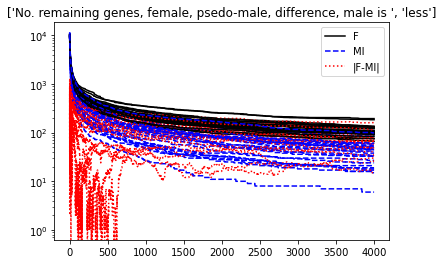

In [4]:
'''
'''
from TestAlgFn import testAlgFn
import matplotlib.pyplot as plt
import numpy as np

nIter = 25 # Number of overall iterations
eqVar = False
nSamples = 1 #  
nCompares = 4000

pMaxFor_cdf = 0.01
cdfN = 20

# Remove all genes expressed fewer than this many times
minExpress = 5


# altMF = 'less'  # Male is less
# altMF = 'greater' # Male is greater
# altMF = 'two-sided'

# switch sexes and test the other way
switchSex = False



for jj in range(nIter):
    print("Iteration",jj)
   
    thisSeed = 3141*jj # Ensure same random generation for both.
    
    shuffleData = True
    impersonateWithMale = False
    sampleWithoutReplacement = True
    nRemainGenes,FemGenes,xVec,cdfMax,Ftmp = testAlgFn(shuffleData, 
                                                       impersonateWithMale,
                                                       sampleWithoutReplacement,
                                                       eqVar,nSamples,nCompares,
                                                       pMaxFor_cdf,cdfN,
                                                       altMF,switchSex,thisSeed,
                                                       ClinicalDF,geneVals):)
    
    impersonateWithMale = True
    nRemainGenes,FemGenes1,xVec,cdfMax,Ftmp = testAlgFn(shuffleData, 
                                                       impersonateWithMale,
                                                       sampleWithoutReplacement,
                                                       eqVar,nSamples,nCompares,
                                                       pMaxFor_cdf,cdfN,
                                                       altMF,switchSex,thisSeed,
                                                       ClinicalDF,geneVals):)
    
    plt.plot(FemGenes,'k-')
    plt.plot(FemGenes1,'b--')
    plt.plot(np.abs(FemGenes-FemGenes1),'r:')

plt.title(["No. remaining genes, female, psedo-male, difference, male is "]+[altMF])
plt.yscale("log")
plt.legend(["F","MI","|F-MI|"])
plt.show()


But if we do not shuffle data, we get a very different answer. This time, males have many more lower-expressed genes than female.

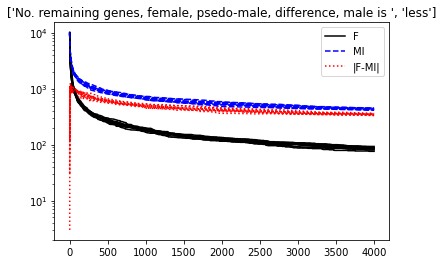

In [5]:
'''
'''
from TestAlgFn import testAlgFn
import matplotlib.pyplot as plt
import numpy as np

nIter = 10 # Number of overall iterations
eqVar = False
nSamples = 1 #  
nCompares = 4000

pMaxFor_cdf = 0.01
cdfN = 20

# Remove all genes expressed fewer than this many times
minExpress = 5


altMF = 'less'  # Male is less
# altMF = 'greater' # Male is greater
# altMF = 'two-sided'

# switch sexes and test the other way
switchSex = False



for jj in range(nIter):
    
    thisSeed = 3141*jj # Ensure same random generation for both.
    
    shuffleData = False
    impersonateWithMale = False
    sampleWithoutReplacement = True
    nRemainGenes,FemGenes,xVec,cdfMax,Ftmp = testAlgFn(shuffleData, 
                                                       impersonateWithMale,
                                                       sampleWithoutReplacement,
                                                       eqVar,nSamples,nCompares,
                                                       pMaxFor_cdf,cdfN,
                                                       altMF,switchSex,thisSeed,
                                                       ClinicalDF,geneVals):)
    
    impersonateWithMale = True
    nRemainGenes,FemGenes1,xVec,cdfMax,Ftmp = testAlgFn(shuffleData, 
                                                       impersonateWithMale,
                                                       sampleWithoutReplacement,
                                                       eqVar,nSamples,nCompares,
                                                       pMaxFor_cdf,cdfN,
                                                       altMF,switchSex,thisSeed,
                                                       ClinicalDF,geneVals):)
    
    plt.plot(FemGenes,'k-')
    plt.plot(FemGenes1,'b--')
    plt.plot(np.abs(FemGenes-FemGenes1),'r:')

plt.title(["No. remaining genes, female, psedo-male, difference, male is "]+[altMF])
plt.yscale("log")
plt.legend(["F","MI","|F-MI|"])
plt.show()

More things to try:

A)  Take a sample $C_0$ of male patients with replacement . Add 5 to all patients' values for 100 randomly chosen genes. Do the above algorithm, replacing $B$ with $C_0$. The idea is to see whether the algorithm detects the 100 genes that you added to. 

B)  Do the same thing except this time sample $C_0$ without replacement and remove it from $A$. Then perform the same test as above, with $C_0$ instead of $B$. 

C)  So far we have only looked at empirical data. We should also test with simulated data. Generate simulated data of the same size using the lognormal distribution. Do the same thing you did in A) and B) with this data.

D) So far we have only looked at how many genes in $B$ are remaining. We should also look at whether it's always the same genes that are remaining. Rerun the test on $B$ and find the frequency with which different genes are remaining. For example, you may run the test 100 times and of those times gene g is remaining 75 out of 100. Record those numbers (frequencies) for each gene, and plot the frequencies.


This notebook is to find differences in expression level between different data sources.
First, plot number of male genes with p values below given threshold for a given site. Do line plots for multiple thresholds.
Second, find number of male genes with p values below threshold for which one site is less than another site.